### Import Numpy and Pandas Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
print("Numpy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)

Numpy Version:  1.24.3
Pandas Version:  2.0.3


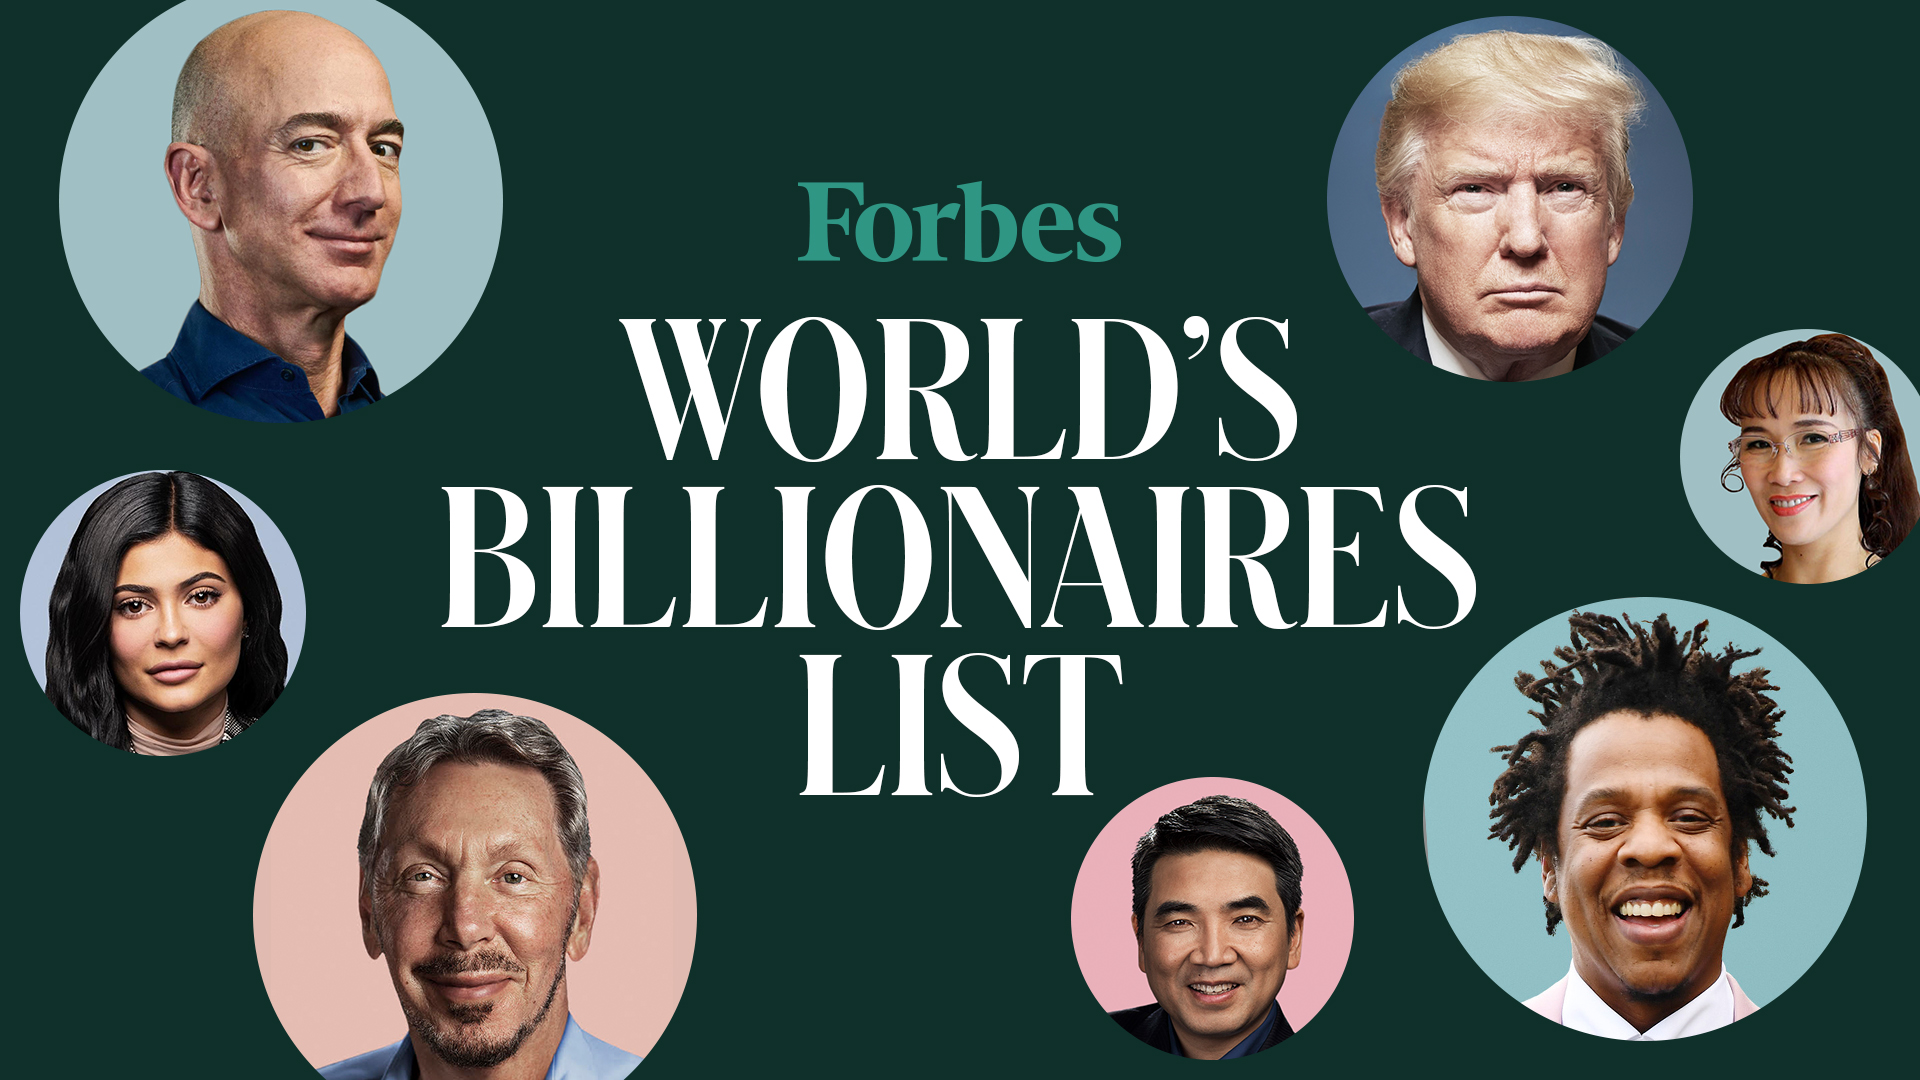

# Q1. Read the '.csv' file into a data frame and display the first 5 rows.

In [3]:
df = pd.read_csv("Forbes_Billionaire.csv")
df.head()

,Rank,Name,Age,Net Worth,Country,Source,Industries
0,1,JEFF BEZOS,56.0,113.0,United States,Amazon,Technology
1,2,BILL GATES,64.0,98.0,United States,Microsoft,Technology
2,3,BERNARD ARNAULT & FAMILY,71.0,76.0,France,LVMH,Fashion & Retail
3,4,WARREN BUFFETT,89.0,67.5,United States,Berkshire Hathaway,Finance & Investments
4,5,LARRY ELLISON,75.0,59.0,United States,software,Technology


In [4]:
df.shape

(2095, 7)

# Q2. Name the top 8 industries with maximum count of billionaires

In [5]:
pd.DataFrame(df.groupby(["Industries"])["Name"].nunique()).sort_values(by = 'Name', ascending = False).head(8)

,Name
Industries,
Finance & Investments,298
Technology,241
Fashion & Retail,209
Manufacturing,198
Real Estate,196
Diversified,169
Food & Beverage,168
Healthcare,149


In [6]:
df_top8 = pd.DataFrame(df.groupby(["Industries"])["Name"].nunique()).reset_index().sort_values(by = 'Name', ascending = False).head(8)
df_top8

,Industries,Name
5,Finance & Investments,298
16,Technology,241
4,Fashion & Retail,209
10,Manufacturing,198
13,Real Estate,196
2,Diversified,169
6,Food & Beverage,168
8,Healthcare,149


In [7]:
df_top8.iloc[0:8, 0:1]

,Industries
5,Finance & Investments
16,Technology
4,Fashion & Retail
10,Manufacturing
13,Real Estate
2,Diversified
6,Food & Beverage
8,Healthcare


# Q3. State the headcount of billionaires from these top 8 industries

In [8]:
df_top8

,Industries,Name
5,Finance & Investments,298
16,Technology,241
4,Fashion & Retail,209
10,Manufacturing,198
13,Real Estate,196
2,Diversified,169
6,Food & Beverage,168
8,Healthcare,149


# Q4. Compare the mean of net worth of billionaires from these top 8 industries.

In [9]:
df.columns

Index(['Rank', 'Name', 'Age', 'Net Worth', 'Country', 'Source', 'Industries'], dtype='object')

In [10]:
## Creating a new data frame for storing the values of only the top 8 industries with the maximum billionaires
new_df_top8 =pd.DataFrame(columns=df.columns)
new_df_top8

,Rank,Name,Age,Net Worth,Country,Source,Industries


In [11]:
## Running a loop to get 8 industries with the most number of billionaries
for i in df_top8['Industries']:
    a=df[df['Industries']==i] #subsetting the original data frame with these industries
    new_df_top8=new_df_top8._append(a) # appending the subset into the new data frame created in the last steo

In [12]:
new_df_top8

,Rank,Name,Age,Net Worth,Country,Source,Industries
3,4,WARREN BUFFETT,89.0,67.5,United States,Berkshire Hathaway,Finance & Investments
36,36,JIM SIMONS,81.0,21.6,United States,hedge funds,Finance & Investments
38,39,JOSEPH SAFRA,81.0,19.9,Brazil,banking,Finance & Investments
45,46,RAY DALIO,70.0,18.0,United States,hedge funds,Finance & Investments
63,64,STEPHEN SCHWARZMAN,73.0,15.4,United States,investments,Finance & Investments
...,...,...,...,...,...,...,...
2016,1990,HENRI BEAUFOUR,54.0,1.0,France,pharmaceuticals,Healthcare
2020,1990,ANNE BEAUFOUR,56.0,1.0,France,pharmaceuticals,Healthcare
2025,1990,VADIM YAKUNIN,57.0,1.0,Russia,pharmacy,Healthcare
2067,1990,FAN MINHUA,58.0,1.0,China,pharmaceuticals,Healthcare


In [13]:
new_df_top8['Industries'].unique()

array(['Finance & Investments', 'Technology', 'Fashion & Retail',
       'Manufacturing', 'Real Estate', 'Diversified', 'Food & Beverage',
       'Healthcare'], dtype=object)

In [14]:
for i in new_df_top8['Industries'].unique():
    print('The average net worth of the billionaires of the industry',i,'is', new_df_top8[new_df_top8['Industries']==i]['Net Worth'].mean(),'billions.')

The average net worth of the billionaires of the industry Finance & Investments is 3.4302013422818796 billions.
The average net worth of the billionaires of the industry Technology is 5.634439834024897 billions.
The average net worth of the billionaires of the industry Fashion & Retail is 5.372727272727273 billions.
The average net worth of the billionaires of the industry Manufacturing is 2.7303030303030305 billions.
The average net worth of the billionaires of the industry Real Estate is 3.277551020408164 billions.
The average net worth of the billionaires of the industry Diversified is 3.2934911242603553 billions.
The average net worth of the billionaires of the industry Food & Beverage is 3.7083333333333335 billions.
The average net worth of the billionaires of the industry Healthcare is 2.857046979865771 billions.


# Q5. Compare the mean age of billionaires from these top 8 industries.

In [15]:
df_top8

,Industries,Name
5,Finance & Investments,298
16,Technology,241
4,Fashion & Retail,209
10,Manufacturing,198
13,Real Estate,196
2,Diversified,169
6,Food & Beverage,168
8,Healthcare,149


In [16]:
new_df_top8.head()

,Rank,Name,Age,Net Worth,Country,Source,Industries
3,4,WARREN BUFFETT,89.0,67.5,United States,Berkshire Hathaway,Finance & Investments
36,36,JIM SIMONS,81.0,21.6,United States,hedge funds,Finance & Investments
38,39,JOSEPH SAFRA,81.0,19.9,Brazil,banking,Finance & Investments
45,46,RAY DALIO,70.0,18.0,United States,hedge funds,Finance & Investments
63,64,STEPHEN SCHWARZMAN,73.0,15.4,United States,investments,Finance & Investments


In [19]:
new_df_top8.groupby(['Industries'])[['Age']].mean()

,Age
Industries,
Diversified,66.889571
Fashion & Retail,66.893204
Finance & Investments,65.810811
Food & Beverage,64.862500
Healthcare,63.088435
Manufacturing,64.139896
Real Estate,65.895288
Technology,55.375527


In [20]:
for i in new_df_top8['Industries'].unique():
    print('The average age of the billionaires of the industry',i,'is',new_df_top8[new_df_top8['Industries']==i]['Age'].mean(),'years.')

The average age of the billionaires of the industry Finance & Investments is 65.8108108108108 years.
The average age of the billionaires of the industry Technology is 55.37552742616034 years.
The average age of the billionaires of the industry Fashion & Retail is 66.89320388349515 years.
The average age of the billionaires of the industry Manufacturing is 64.139896373057 years.
The average age of the billionaires of the industry Real Estate is 65.89528795811518 years.
The average age of the billionaires of the industry Diversified is 66.88957055214723 years.
The average age of the billionaires of the industry Food & Beverage is 64.8625 years.
The average age of the billionaires of the industry Healthcare is 63.08843537414966 years.


In [21]:
print('The mean age of the billionaires from these industries is:',round(new_df_top8['Age'].mean(),2),'years.')

The mean age of the billionaires from these industries is: 63.97 years.


# Q6. Name the Richest billionaire in the Automotive sector

In [24]:
df.columns

Index(['Rank', 'Name', 'Age', 'Net Worth', 'Country', 'Source', 'Industries'], dtype='object')

In [25]:
df['Industries'].unique

<bound method Series.unique of 0                  Technology
1                  Technology
2            Fashion & Retail
3       Finance & Investments
4                  Technology
                ...          
2090               Automotive
2091              Diversified
2092            Manufacturing
2093                  Service
2094               Automotive
Name: Industries, Length: 2095, dtype: object>

In [26]:
df[df['Industries']=='Automotive'].head()

,Rank,Name,Age,Net Worth,Country,Source,Industries
30,31,ELON MUSK,48.0,24.6,United States,"Tesla, SpaceX",Automotive
53,54,SUSANNE KLATTEN,57.0,16.8,Germany,"BMW, pharmaceuticals",Automotive
95,96,LI SHUFU,56.0,12.4,China,automobiles,Automotive
98,98,STEFAN QUANDT,53.0,12.3,Germany,BMW,Automotive
165,165,LU ZHONGFANG,77.0,8.2,China,education,Automotive


In [28]:
df[df['Industries']=='Automotive'].sort_values(by = 'Net Worth', ascending = False).head(1)

,Rank,Name,Age,Net Worth,Country,Source,Industries
30,31,ELON MUSK,48.0,24.6,United States,"Tesla, SpaceX",Automotive


In [31]:
df[df['Industries']=='Automotive'].sort_values(by = 'Net Worth', ascending = False).head(1).loc[:,'Name']

30    ELON MUSK
Name: Name, dtype: object

In [33]:
df[df['Industries']=='Automotive'].sort_values(by = 'Net Worth', ascending = False).head(1).values[0][1]

'ELON MUSK'

In [35]:
print('The richest billionaires in the Automotive sector is', 
      df[df['Industries']=='Automotive'].sort_values(by = 'Net Worth', ascending = False).head(1).values[0][1], 
      'with a net worth of',
      df[df['Industries']=='Automotive'].sort_values(by = 'Net Worth', ascending = False).head(1).values[0][3],
      'billions.')

The richest billionaires in the Automotive sector is ELON MUSK with a net worth of 24.6 billions.


# Q7. Name top 5 countries with maximum number of billionaires.

In [36]:
df.head()

,Rank,Name,Age,Net Worth,Country,Source,Industries
0,1,JEFF BEZOS,56.0,113.0,United States,Amazon,Technology
1,2,BILL GATES,64.0,98.0,United States,Microsoft,Technology
2,3,BERNARD ARNAULT & FAMILY,71.0,76.0,France,LVMH,Fashion & Retail
3,4,WARREN BUFFETT,89.0,67.5,United States,Berkshire Hathaway,Finance & Investments
4,5,LARRY ELLISON,75.0,59.0,United States,software,Technology


In [38]:
df.groupby(['Country'])['Name'].count().reset_index()

,Country,Name
0,Algeria,1
1,Angola,1
2,Argentina,4
3,Australia,31
4,Austria,9
...,...,...
67,United Kingdom,45
68,United States,614
69,Venezuela,1
70,Vietnam,4


In [41]:
df.groupby(['Country'])['Name'].count().reset_index().sort_values(by = 'Name', ascending = False).head(5)

,Country,Name
68,United States,614
9,China,387
19,Germany,107
25,India,102
52,Russia,99


In [42]:
df_top5 = df.groupby(['Country'])['Name'].nunique().reset_index().sort_values(by = 'Name', ascending = False).head(5)
df_top5

,Country,Name
68,United States,614
9,China,387
19,Germany,107
25,India,102
52,Russia,99


In [43]:
df_top5.iloc[:,0:1]

,Country
68,United States
9,China
19,Germany
25,India
52,Russia


# Q8. Which amongst these top 5 countries have the lowest mean age of billionaires ?

In [46]:
df_merge=pd.merge(df_top5, df, on = 'Country', how = 'inner')
df_merge

,Country,Name_x,Rank,Name_y,Age,Net Worth,Source,Industries
0,United States,614,1,JEFF BEZOS,56.0,113.0,Amazon,Technology
1,United States,614,2,BILL GATES,64.0,98.0,Microsoft,Technology
2,United States,614,4,WARREN BUFFETT,89.0,67.5,Berkshire Hathaway,Finance & Investments
3,United States,614,5,LARRY ELLISON,75.0,59.0,software,Technology
4,United States,614,7,MARK ZUCKERBERG,35.0,54.7,Facebook,Technology
...,...,...,...,...,...,...,...,...
1304,Russia,99,1990,EDUARD CHUKHLEBOV,56.0,1.0,metallurgy,Metals & Mining
1305,Russia,99,1990,VADIM YAKUNIN,57.0,1.0,pharmacy,Healthcare
1306,Russia,99,1990,IGOR KUDRYASHKIN,58.0,1.0,metallurgy,Metals & Mining
1307,Russia,99,1990,RUSTEM SULTEEV,66.0,1.0,"refinery, chemicals",Energy


In [62]:
(df_merge.groupby(['Country'])['Age'].mean())

Country
China            56.790026
Germany          64.147368
India            66.206186
Russia           56.848485
United States    66.911620
Name: Age, dtype: float64

In [63]:
pd.DataFrame(df_merge.groupby(['Country'])['Age'].mean())

,Age
Country,
China,56.790026
Germany,64.147368
India,66.206186
Russia,56.848485
United States,66.911620


In [65]:
df_mean_age =  pd.DataFrame(df_merge.groupby(['Country'])['Age'].mean()).sort_values(by = 'Age', ascending = True).head(1)
df_mean_age

,Age
Country,
China,56.790026


In [67]:
df_mean_age.reset_index()

,Country,Age
0,China,56.790026


In [73]:
df_mean_age.reset_index().values[0][0]

'China'

In [76]:
# answer in my way
print('The country which has the lowest mean age amongst the top 5 countries with the maximum number of billionaires is',
     df_mean_age.reset_index().values[0][0], 'with an average age of', round(df_mean_age.reset_index().values[0][1],2)
      , 'years.')

The country which has the lowest mean age amongst the top 5 countries with the maximum number of billionaires is China with an average age of 56.79 years.


In [77]:
# provided solution
mean_age_df=pd.DataFrame(columns=['Country','Mean Age'])
mean_age_df

,Country,Mean Age


In [79]:
for i in df_top5['Country']:
    mean=df[df['Country']==i]['Age'].mean()
    print('The mean age of',i,'is',mean,'years.')
    mean_age_df=mean_age_df._append({'Country':i,'Mean Age':mean},ignore_index=True)

The mean age of United States is 66.91162029459902 years.
The mean age of China is 56.79002624671916 years.
The mean age of Germany is 64.14736842105263 years.
The mean age of India is 66.20618556701031 years.
The mean age of Russia is 56.84848484848485 years.


In [80]:
mean_age_df

,Country,Mean Age
0,United States,66.911620
1,China,56.790026
2,Germany,64.147368
3,India,66.206186
4,Russia,56.848485


In [84]:
print('The country which has the lowest mean age amongst the top 5 countries with the maximum number of billionaires is',
 mean_age_df.sort_values(by='Mean Age',ascending=True).head(1).values[0][0],'with an average age of',
 round(mean_age_df.sort_values(by='Mean Age',ascending=True).head(1).values[0][1],2),'years.'
)

The country which has the lowest mean age amongst the top 5 countries with the maximum number of billionaires is China with an average age of 56.79 years.


# Q9. Name the richest Chinese billionaire and his net worth

In [85]:
df.head()

,Rank,Name,Age,Net Worth,Country,Source,Industries
0,1,JEFF BEZOS,56.0,113.0,United States,Amazon,Technology
1,2,BILL GATES,64.0,98.0,United States,Microsoft,Technology
2,3,BERNARD ARNAULT & FAMILY,71.0,76.0,France,LVMH,Fashion & Retail
3,4,WARREN BUFFETT,89.0,67.5,United States,Berkshire Hathaway,Finance & Investments
4,5,LARRY ELLISON,75.0,59.0,United States,software,Technology


In [89]:
print('The richest Chinese billionaire is'
      ,df[df['Country'] == 'China'].sort_values(by = 'Net Worth', ascending = False).values[0][1],
      'with a Net Worth of',
      df[df['Country'] == 'China'].sort_values(by = 'Net Worth', ascending = False).values[0][3], 'billions')

The richest Chinese billionaire is JACK MA with a Net Worth of 38.8 billions


# Q10. Name top 5 Industries with maximum number of Indian billionaires.

In [90]:
df.head()

,Rank,Name,Age,Net Worth,Country,Source,Industries
0,1,JEFF BEZOS,56.0,113.0,United States,Amazon,Technology
1,2,BILL GATES,64.0,98.0,United States,Microsoft,Technology
2,3,BERNARD ARNAULT & FAMILY,71.0,76.0,France,LVMH,Fashion & Retail
3,4,WARREN BUFFETT,89.0,67.5,United States,Berkshire Hathaway,Finance & Investments
4,5,LARRY ELLISON,75.0,59.0,United States,software,Technology


In [97]:
pd.DataFrame(df[df['Country'] == 'India'].groupby(['Industries'])['Name'].nunique()).reset_index().sort_values(by='Name', ascending = False).head(5)

,Industries,Name
7,Healthcare,17
8,Manufacturing,14
2,Diversified,13
13,Technology,11
6,Food & Beverage,8


In [101]:
print('The top 5 industries with maximum number of Indian billionaires are the following:')
pd.DataFrame(df[df['Country'] == 'India'].groupby(['Industries'])['Name'].nunique()).reset_index().sort_values(by='Name', ascending = False).head(5).iloc[0:5,0:1]

The top 5 industries with maximum number of Indian billionaires are the following:


,Industries
7,Healthcare
8,Manufacturing
2,Diversified
13,Technology
6,Food & Beverage


# Q11. Name all the Indian billionaires in global top 100 list.

In [102]:
df.head()

,Rank,Name,Age,Net Worth,Country,Source,Industries
0,1,JEFF BEZOS,56.0,113.0,United States,Amazon,Technology
1,2,BILL GATES,64.0,98.0,United States,Microsoft,Technology
2,3,BERNARD ARNAULT & FAMILY,71.0,76.0,France,LVMH,Fashion & Retail
3,4,WARREN BUFFETT,89.0,67.5,United States,Berkshire Hathaway,Finance & Investments
4,5,LARRY ELLISON,75.0,59.0,United States,software,Technology


In [108]:
df_top100 = df.sort_values(by = 'Net Worth', ascending = False).head(100)
df_top100

,Rank,Name,Age,Net Worth,Country,Source,Industries
0,1,JEFF BEZOS,56.0,113.0,United States,Amazon,Technology
1,2,BILL GATES,64.0,98.0,United States,Microsoft,Technology
2,3,BERNARD ARNAULT & FAMILY,71.0,76.0,France,LVMH,Fashion & Retail
3,4,WARREN BUFFETT,89.0,67.5,United States,Berkshire Hathaway,Finance & Investments
4,5,LARRY ELLISON,75.0,59.0,United States,software,Technology
...,...,...,...,...,...,...,...
95,96,LI SHUFU,56.0,12.4,China,automobiles,Automotive
96,96,HASSO PLATTNER & FAMILY,76.0,12.4,Germany,software,Technology
98,98,STEFAN QUANDT,53.0,12.3,Germany,BMW,Automotive
97,98,LIU YONGHAO & FAMILY,68.0,12.3,China,agribusiness,Service


In [109]:
df_top100[df_top100['Country'] == 'India']

,Rank,Name,Age,Net Worth,Country,Source,Industries
20,21,MUKESH AMBANI,62.0,36.8,India,"petrochemicals, oil & gas",Energy
77,78,RADHAKISHAN DAMANI & FAMILY,65.0,13.8,India,"retail, investments",Fashion & Retail


In [111]:
df_top100[df_top100['Country'] == 'India']['Name'].values

array(['MUKESH AMBANI', 'RADHAKISHAN DAMANI & FAMILY'], dtype=object)

# Q12. Name all the billionaires in India who are younger than 50 years. Also state their mean net worth

In [112]:
df.head()

,Rank,Name,Age,Net Worth,Country,Source,Industries
0,1,JEFF BEZOS,56.0,113.0,United States,Amazon,Technology
1,2,BILL GATES,64.0,98.0,United States,Microsoft,Technology
2,3,BERNARD ARNAULT & FAMILY,71.0,76.0,France,LVMH,Fashion & Retail
3,4,WARREN BUFFETT,89.0,67.5,United States,Berkshire Hathaway,Finance & Investments
4,5,LARRY ELLISON,75.0,59.0,United States,software,Technology


In [114]:
df_India = df[df['Country'] == 'India']
df_India

,Rank,Name,Age,Net Worth,Country,Source,Industries
20,21,MUKESH AMBANI,62.0,36.8,India,"petrochemicals, oil & gas",Energy
77,78,RADHAKISHAN DAMANI & FAMILY,65.0,13.8,India,"retail, investments",Fashion & Retail
102,103,SHIV NADAR,74.0,11.9,India,software services,Technology
128,129,UDAY KOTAK,61.0,10.4,India,banking,Finance & Investments
154,155,GAUTAM ADANI,57.0,8.9,India,"commodities, ports",Diversified
...,...,...,...,...,...,...,...
1888,1851,SANDEEP ENGINEER,58.0,1.1,India,plastic pipes,Manufacturing
1902,1851,S.D. SHIBULAL,65.0,1.1,India,software services,Technology
1970,1851,ARVIND PODDAR,62.0,1.1,India,tires,Automotive
1983,1851,MOFATRAJ MUNOT,75.0,1.1,India,real estate,Real Estate


In [115]:
df_India[df_India['Age'] < 50]

,Rank,Name,Age,Net Worth,Country,Source,Industries
874,875,VIJAY SHEKHAR SHARMA,41.0,2.4,India,financial technology,Service
1196,1196,BYJU RAVEENDRAN,38.0,1.8,India,education technology,Technology
1237,1196,VIKAS OBEROI,49.0,1.8,India,real estate,Real Estate
1420,1415,RANJAN PAI,47.0,1.5,India,education,Service
1618,1613,SHAMSHEER VAYALIL,43.0,1.3,India,healthcare,Healthcare
1732,1730,SACHIN BANSAL,38.0,1.2,India,flipkart,Fashion & Retail
1742,1730,RADHA VEMBU,47.0,1.2,India,technology,Technology
1856,1851,BINNY BANSAL,37.0,1.1,India,flipkart,Technology
1867,1851,ACHARYA BALKRISHNA,47.0,1.1,India,consumer goods,Food & Beverage


In [120]:
print('The names of the Indian Billionaires under the age of 50 are:') 
df_India[df_India['Age'] < 50]['Name'].values

The names of the Indian Billionaires under the age of 50 are:


array(['VIJAY SHEKHAR SHARMA', 'BYJU RAVEENDRAN', 'VIKAS OBEROI',
       'RANJAN PAI', 'SHAMSHEER VAYALIL', 'SACHIN BANSAL', 'RADHA VEMBU',
       'BINNY BANSAL', 'ACHARYA BALKRISHNA'], dtype=object)

In [122]:
df_India[df_India['Age'] < 50]['Net Worth'].mean()

1.488888888888889

In [124]:
print('The average Net Worth of Indian Billionaires below the age of 50 is')
round(df_India[df_India['Age'] < 50]['Net Worth'].mean(),3)

The average Net Worth of Indian Billionaires below the age of 50 is


1.489

# Q13. Name the Indian billionaires from real estate sector who are richer than 'DONALD TRUMP'.

In [126]:
df.head()

,Rank,Name,Age,Net Worth,Country,Source,Industries
0,1,JEFF BEZOS,56.0,113.0,United States,Amazon,Technology
1,2,BILL GATES,64.0,98.0,United States,Microsoft,Technology
2,3,BERNARD ARNAULT & FAMILY,71.0,76.0,France,LVMH,Fashion & Retail
3,4,WARREN BUFFETT,89.0,67.5,United States,Berkshire Hathaway,Finance & Investments
4,5,LARRY ELLISON,75.0,59.0,United States,software,Technology


In [137]:
df_India_RealEstate = df[(df['Country'] =='India') & (df['Industries'] == 'Real Estate')]
df_India_RealEstate

,Rank,Name,Age,Net Worth,Country,Source,Industries
494,494,KUSHAL PAL SINGH,88.0,3.7,India,real estate,Real Estate
774,764,CHANDRU RAHEJA,79.0,2.7,India,real estate,Real Estate
1237,1196,VIKAS OBEROI,49.0,1.8,India,real estate,Real Estate
1253,1196,MANGAL PRABHAT LODHA,64.0,1.8,India,real estate,Real Estate
1395,1335,JITENDRA VIRWANI,54.0,1.6,India,real estate,Real Estate
1712,1613,NIRANJAN HIRANANDANI,70.0,1.3,India,real estate,Real Estate
1716,1613,SUBHASH RUNWAL,76.0,1.3,India,real estate,Real Estate
1983,1851,MOFATRAJ MUNOT,75.0,1.1,India,real estate,Real Estate


In [136]:
df_DonaldTrump = df[df['Name'] == 'DONALD TRUMP']['Net Worth'].values[0]
df_DonaldTrump

2.1

In [139]:
df_India_RealEstate[df_India_RealEstate['Net Worth'] > df_DonaldTrump]

,Rank,Name,Age,Net Worth,Country,Source,Industries
494,494,KUSHAL PAL SINGH,88.0,3.7,India,real estate,Real Estate
774,764,CHANDRU RAHEJA,79.0,2.7,India,real estate,Real Estate


In [142]:
df_India_RealEstate[df_India_RealEstate['Net Worth'] > df_DonaldTrump]['Name'].values[0]

'KUSHAL PAL SINGH'

In [143]:
print('The Indian billionaires from the Real Estate Industry who are richer than Donald Trump are',
      df_India_RealEstate[df_India_RealEstate['Net Worth'] > df_DonaldTrump]['Name'].values[0], 'and',
      df_India_RealEstate[df_India_RealEstate['Net Worth'] > df_DonaldTrump]['Name'].values[1])

The Indian billionaires from the Real Estate Industry who are richer than Donald Trump are KUSHAL PAL SINGH and CHANDRU RAHEJA


# Q14. What is the total cumulative net worth of all the billionaires?

In [144]:
df['Net Worth'].sum()

8037.499999999999

# END